In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True) # To get different different colors
pd.set_option('display.max_columns',None) # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [17]:
pd.read_csv(r"C:\Users\saiprithi\Downloads\preprocessd_data.csv")

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [18]:
data=pd.read_csv(r"C:\Users\saiprithi\Downloads\preprocessd_data.csv")
x=data.drop('churn',axis=1)
y=data['churn']
x.shape,y.shape

((3406, 10), (3406,))

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [22]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'algorithm': ['auto'],  # ✅ Corrected here
    'weights': ['uniform', 'distance']
}

In [24]:
knn_grid_search = GridSearchCV(knn, param_grid, cv=5)



In [25]:
knn_grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [26]:
knn_best_model=knn_grid_search.best_estimator_
knn_best_model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [27]:
y_pred=knn_best_model.predict(x_test)


In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
metrics=[accuracy,precision,recall,f1]
idx=['accuracy','precision','recall','f1']
pd.DataFrame(metrics,index=idx,columns=['metrics'])


,metrics
accuracy,0.901760
precision,0.836228
recall,0.997041
f1,0.909582


In [29]:
prob=knn_best_model.predict_proba(x_test)
prob_yes=prob[:,1]

0.9518929750928855


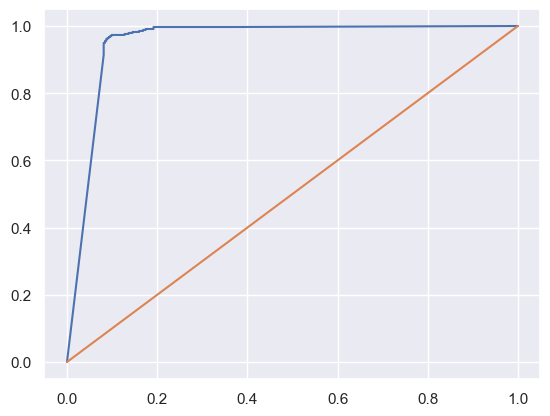

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,prob_yes)
print(roc_auc_score(y_test,prob_yes))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

## logestic

In [31]:
from sklearn.linear_model import LogisticRegression
log_grid=LogisticRegression()
log_grid

LogisticRegression()

In [32]:
log_grid.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
param_grid_log={
 'penalty': ['l1', 'l2'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear'],
 'max_iter': [100, 200, 500],
 'class_weight': ['balanced'],
}
param_grid_log


{'penalty': ['l1', 'l2'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear'],
 'max_iter': [100, 200, 500],
 'class_weight': ['balanced']}

In [34]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search_log=GridSearchCV(log_grid,param_grid_log,scoring='accuracy',cv=5,verbose=True)

In [35]:
grid_search_log

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=True)

In [36]:
grid_search_log.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=True)

In [37]:
log_best_model=grid_search_log.best_estimator_
log_best_model

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [38]:
y_pred=log_best_model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
metrics=[accuracy,precision,recall,f1]
idx=['accuracy','precision','recall','f1']
pd.DataFrame(metrics,index=idx,columns=['metrics'])

,metrics
accuracy,0.715543
precision,0.713018
recall,0.713018
f1,0.713018


In [40]:
prob=log_best_model.predict_proba(x_test)
prob_yes=prob[:,1]

0.7941894867207927


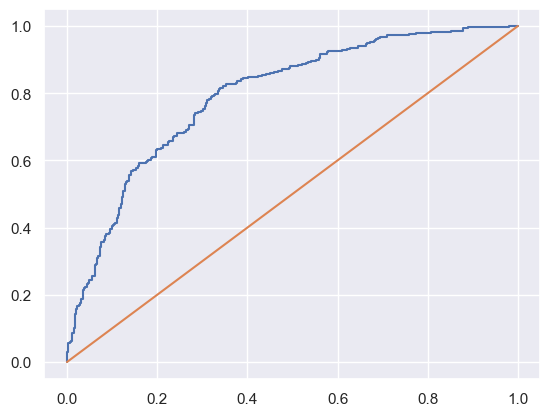

In [41]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,prob_yes)
print(roc_auc_score(y_test,prob_yes))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

## Navie Bayes`

In [42]:
from sklearn.naive_bayes import GaussianNB
grid_nb=GaussianNB()
grid_nb

GaussianNB()

In [43]:
grid_nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [44]:
param_grid_nb={
 'var_smoothing':[1e-09, 1e-08, 1e-07, 1e-06],
 'priors':[[0.5, 0.5],[0.7, 0.3],[0.3, 0.7]]}

In [45]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search_nb=GridSearchCV(grid_nb,param_grid_nb,scoring='accuracy',cv=5)
                            

In [46]:
grid_search_nb

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [[0.5, 0.5], [0.7, 0.3], [0.3, 0.7]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [47]:
grid_search_nb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [[0.5, 0.5], [0.7, 0.3], [0.3, 0.7]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [48]:
nb_best_model=grid_search_nb.best_estimator_
nb_best_model

GaussianNB(priors=[0.5, 0.5])

In [49]:
y_pred=log_best_model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
metrics=[accuracy,precision,recall,f1]
idx=['accuracy','precision','recall','f1']
pd.DataFrame(metrics,index=idx,columns=['metrics'])

,metrics
accuracy,0.715543
precision,0.713018
recall,0.713018
f1,0.713018


In [51]:
prob=log_best_model.predict_proba(x_test)
prob_yes=prob[:,1]

0.7941894867207927


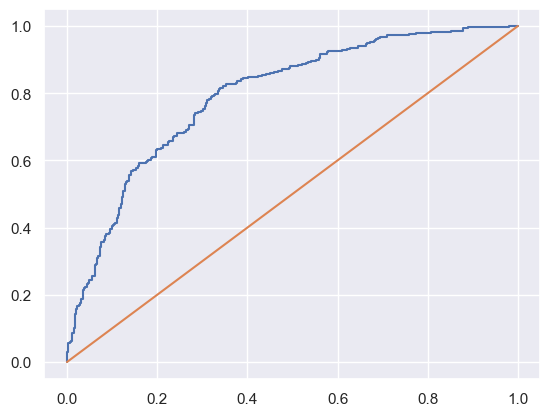

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,prob_yes)
print(roc_auc_score(y_test,prob_yes))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

## ensmble

In [53]:
from sklearn.ensemble import RandomForestClassifier
grid_rf=RandomForestClassifier()
grid_rf

RandomForestClassifier()

In [67]:
dir(grid_rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mim

In [54]:
grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
param_grid_rf={
 'n_estimators':[100,200,300],
 'criterion':['gini','entropy'],
 'min_samples_split':[2,5,10],
 'min_samples_leaf':[1,2,4],}

In [56]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search_rf=GridSearchCV(grid_rf,param_grid_rf,scoring='accuracy',cv=5)

In [57]:
grid_search_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [58]:
grid_search_nb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [[0.5, 0.5], [0.7, 0.3], [0.3, 0.7]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [60]:
rf_best_model=grid_search_rf.best_estimator_
rf_best_model

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [61]:
y_pred=log_best_model.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
metrics=[accuracy,precision,recall,f1]
idx=['accuracy','precision','recall','f1']
pd.DataFrame(metrics,index=idx,columns=['metrics'])

,metrics
accuracy,0.715543
precision,0.713018
recall,0.713018
f1,0.713018


In [63]:
prob=log_best_model.predict_proba(x_test)
prob_yes=prob[:,1]

0.7941894867207927


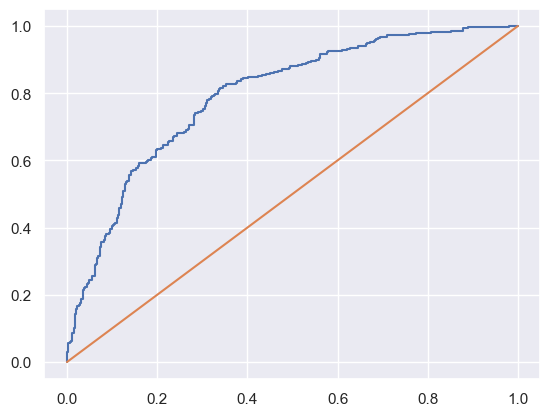

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,prob_yes)
print(roc_auc_score(y_test,prob_yes))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

In [66]:
dir(grid_search)

NameError: name 'grid_search' is not defined